In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle


In [2]:
df=pd.read_csv('miss_fr.csv')
print(df.shape)

(7295, 9)


In [3]:
df.head()

,nom,prenom,occupation,age,taille,poids,options,genre,label
0,SCHNEBLI,Hermine,Travail:temps plein,26,1.77,49,1,La France,0
1,DE WISIGOTHIE,Blandine,Etudiante,26,1.81,73,3,Asie,0
2,D ANGOULEME,Stephanie,Etudiante,24,1.74,46,4,La France,1
3,DE PROVENCE,Maria,Travail:temps plein,22,1.63,65,3,Asie,0
4,DE COURTENAY,Ysaline,Travail:temps plein,24,1.66,48,1,Europe (autre que la France),0


In [4]:

#initialisation config plot
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


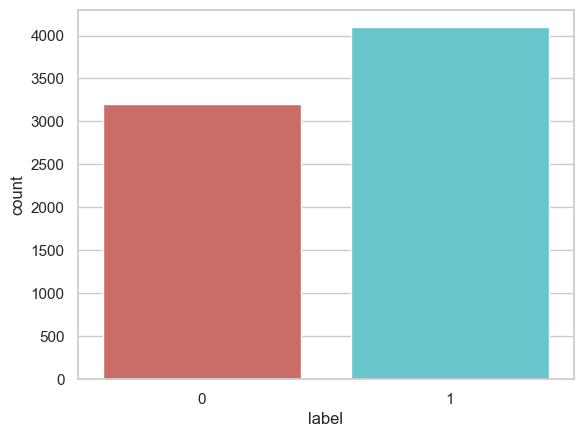

In [5]:
#visualisation label 
sns.countplot(x=df['label'], data=df,palette='hls')
plt.show()

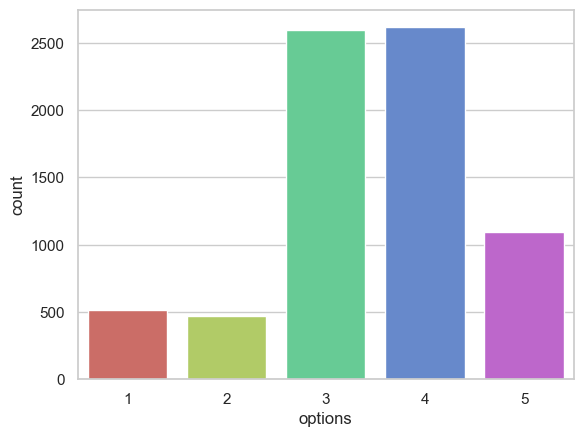

In [6]:
#visualisation options (lgge)
sns.countplot(x=df['options'], data=df,palette='hls')
plt.show()

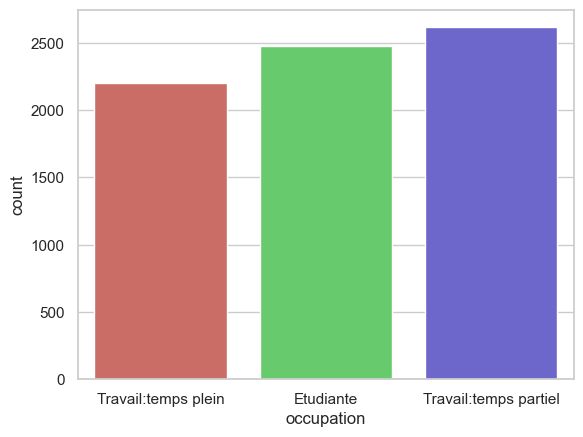

In [7]:
#visualisation ocuupation
sns.countplot(x=df['occupation'], data=df,palette='hls')
plt.show()


In [8]:
#label encoding occupation de données catégorique en données numériques(ordre par importance )
lab = LabelEncoder()
lab.fit_transform(df['occupation'])
label_mapping = {"Travail:temps plein": 0, "Travail:temps partiel": 1, "Etudiante": 2}
df['occup']=df['occupation']
df = df.replace({"occup": label_mapping})
df.head(20)

,nom,prenom,occupation,age,taille,poids,options,genre,label,occup
0,SCHNEBLI,Hermine,Travail:temps plein,26,1.77,49,1,La France,0,0
1,DE WISIGOTHIE,Blandine,Etudiante,26,1.81,73,3,Asie,0,2
2,D ANGOULEME,Stephanie,Etudiante,24,1.74,46,4,La France,1,2
3,DE PROVENCE,Maria,Travail:temps plein,22,1.63,65,3,Asie,0,0
4,DE COURTENAY,Ysaline,Travail:temps plein,24,1.66,48,1,Europe (autre que la France),0,0
5,BUJOLD,Luce,Etudiante,26,1.66,66,3,La France,1,2
6,DE TOULOUSE,Armelle,Etudiante,25,1.88,71,2,Afrique,0,2
7,MALTAIS,Brune,Travail:temps partiel,27,1.67,74,4,La France,0,1
8,DE SAXE,Alice,Etudiante,25,1.85,54,1,Amerique,0,2
9,DE WISIGOTHIE,Juliette,Travail:temps partiel,26,1.63,58,4,Asie,1,1


In [9]:
#la colonne du label 
y=df['label']
#les colonnes des featurs 
X=df.drop(['label','nom','prenom','occupation','genre'],axis=1)

In [10]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [11]:
X.head()

,age,taille,poids,options,occup
0,26,1.77,49,1,0
1,26,1.81,73,3,2
2,24,1.74,46,4,2
3,22,1.63,65,3,0
4,24,1.66,48,1,0


In [12]:
#train 70% / test30% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.head()

,age,taille,poids,options,occup
933,27,1.64,59,4,2
6197,24,1.79,68,5,0
3524,23,1.76,61,3,2
1213,24,1.64,57,2,2
3131,24,1.83,48,3,1


In [14]:
#model training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [15]:
#predecting result
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))



Accuracy of logistic regression classifier on test set: 0.84


In [16]:
#evaluation matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       947
           1       0.86      0.86      0.86      1242

    accuracy                           0.84      2189
   macro avg       0.84      0.84      0.84      2189
weighted avg       0.84      0.84      0.84      2189



In [17]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [18]:
#confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 779  168]
 [ 177 1065]]


779+1065 = 1844  true predections 
177+168 = 345 false predections

In [19]:
selection_model = 'selection_model.pkl'
with open(selection_model, 'wb') as file:
    pickle.dump(logreg, file)


In [20]:
with open(selection_model, 'rb') as file:
   prediction_model = pickle.load(file)

In [21]:
X.head()

,age,taille,poids,options,occup
0,26,1.77,49,1,0
1,26,1.81,73,3,2
2,24,1.74,46,4,2
3,22,1.63,65,3,0
4,24,1.66,48,1,0


In [22]:
dictt = {"nom":"aaa","prenom":"bbb","occupation":"Travail:temps plein","age":19,"taille":1.55,"poids":46,"options":3,"genre":"af"}

In [23]:
df1 = pd.DataFrame([dictt])

In [24]:
df1.head()

,nom,prenom,occupation,age,taille,poids,options,genre
0,aaa,bbb,Travail:temps plein,19,1.55,46,3,af


In [25]:
lab = LabelEncoder()
lab.fit_transform(df1['occupation'])
label_mapping = {"Travail:temps plein": 0, "Travail:temps partiel": 1, "Etudiante": 2}
df1['occup']=df1['occupation']
df1 = df1.replace({"occup": label_mapping})
df1.head(20)

,nom,prenom,occupation,age,taille,poids,options,genre,occup
0,aaa,bbb,Travail:temps plein,19,1.55,46,3,af,0


In [26]:

#les colonnes des featurs 
X=df1.drop(['nom','prenom','occupation','genre'],axis=1)

In [27]:
X.head()

,age,taille,poids,options,occup
0,19,1.55,46,3,0


In [28]:
X_test.head()

,age,taille,poids,options,occup
4722,22,1.75,46,3,2
4448,27,1.71,50,5,0
831,23,1.84,63,3,1
641,27,1.71,73,3,0
2039,25,1.83,47,3,2


In [29]:
y_pred = prediction_model.predict(X)

In [30]:
y_pred[0]

0

In [31]:
y_test.head()

4722    1
4448    0
831     1
641     0
2039    1
Name: label, dtype: int64

In [32]:
X_test.head()

,age,taille,poids,options,occup
4722,22,1.75,46,3,2
4448,27,1.71,50,5,0
831,23,1.84,63,3,1
641,27,1.71,73,3,0
2039,25,1.83,47,3,2


In [33]:
X.head()

,age,taille,poids,options,occup
0,19,1.55,46,3,0


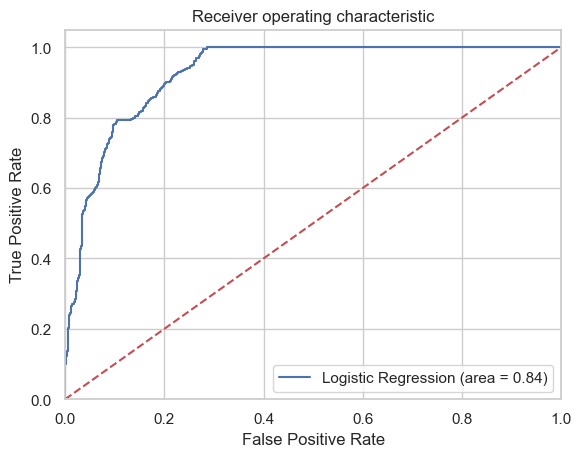

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

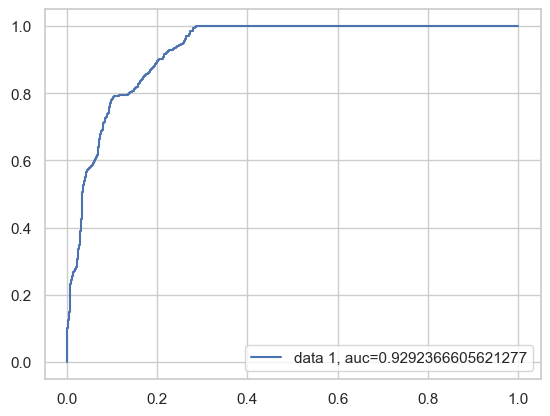

In [35]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()